# Stage08: Exploratory Data Analysis

### 1.Quick Look

In [ ]:
#import libraries
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import skew, kurtosis
sns.set(context='talk', style='whitegrid')
pd.set_option('display.max_columns', 100)

#quick check
df = pd.read_csv('../data/processed/combined_cleaned_data.csv', index_col='date', parse_dates=['date'])

df.info()
df.isna().sum()
df.describe()
print("Data shape:", df.shape)
print(df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2024-06-01 to 2024-06-30
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      30 non-null     float64
 1   high      30 non-null     float64
 2   low       30 non-null     float64
 3   close     30 non-null     float64
 4   volume    30 non-null     float64
 5   MCAR_col  30 non-null     float64
 6   MAR_col   30 non-null     float64
 7   MNAR_col  0 non-null      float64
dtypes: float64(8)
memory usage: 2.1 KB
Data shape: (30, 8)
              open    high    low   close    volume  MCAR_col  MAR_col  \
date                                                                     
2024-06-01  198.14  241.17  57.03  186.24  0.944293   240.145   241.17   
2024-06-02  187.33  241.17  60.92  144.20  0.978533   241.170   241.17   
2024-06-03  170.26  255.66  96.07  160.04  0.093750   255.660   255.66   
2024-06-04  197.31  233.81  55.64  144.20  0.519565   233.

## 2. Numeric profile

In [13]:
# Numeric profile
desc = df[['open','high','low','close','volume']].describe().T
desc['skew'] = [skew(df[c].dropna()) for c in desc.index]
desc['kurtosis'] = [kurtosis(df[c].dropna()) for c in desc.index]
desc

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
open,30.0,154.075333,29.913683,100.85,137.507500,162.730000,169.687500,198.14,-0.420150,-0.815595
high,30.0,245.617333,28.397908,203.06,224.145000,241.170000,265.860000,298.75,0.408957,-0.932145
low,30.0,71.645667,13.677916,52.42,60.875000,67.940000,79.330000,98.21,0.494426,-0.900304
close,30.0,147.026667,24.636490,101.51,130.290000,144.200000,159.772500,195.36,0.306519,-0.702184
volume,30.0,0.527264,0.321401,0.00,0.289266,0.519565,0.800408,1.00,0.032709,-1.202394


## 3. Distributions (add at least 3)

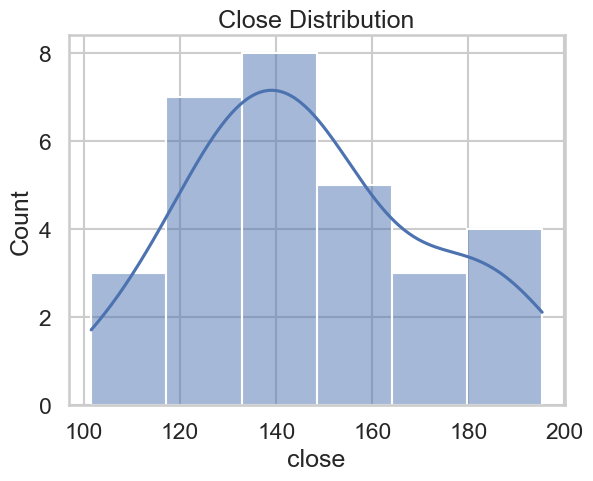

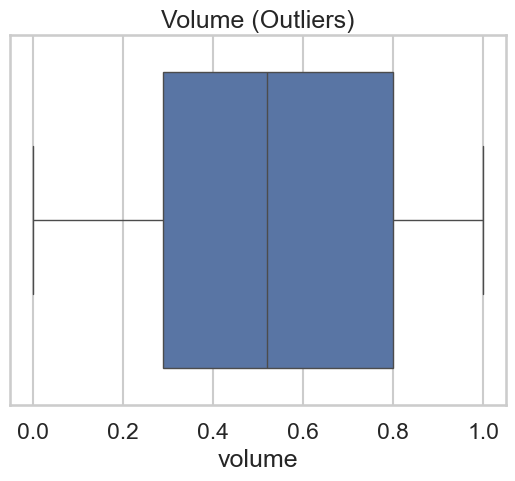

In [31]:
# histogram + KDE for a key variable
sns.histplot(df['close'].dropna(), kde=True)
plt.title('Close Distribution')
plt.show()

# boxplot for outliers
sns.boxplot(x=df['volume'].dropna())
plt.title('Volume (Outliers)')
plt.show()

## 4. Relationships ( add at least 2)

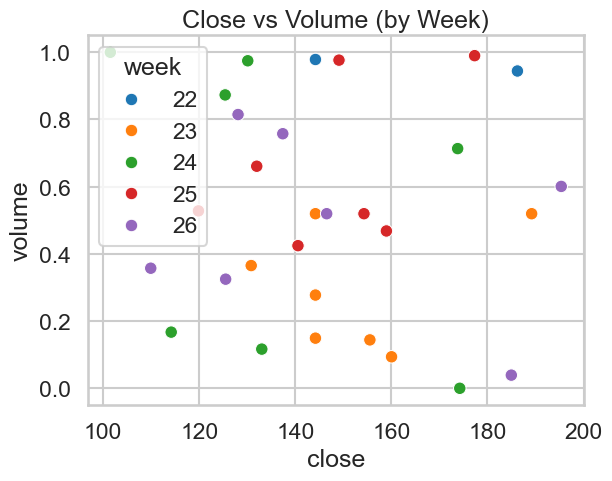

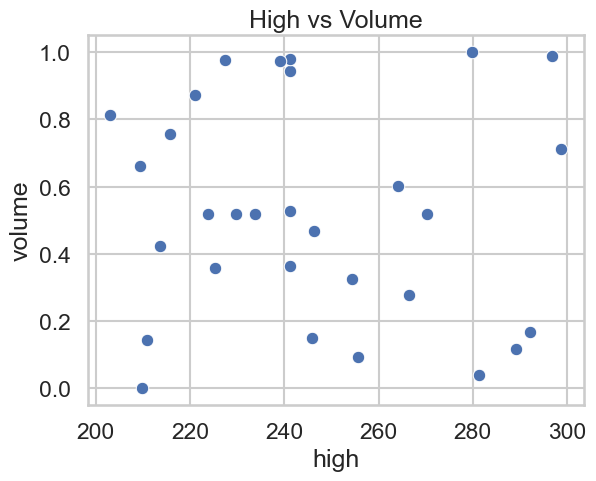

In [33]:
df = df.copy()
df['week'] = pd.to_datetime(df['date']).dt.isocalendar().week

sns.scatterplot(data=df, x='close', y='volume', hue='week', palette='tab10')
plt.title('Close vs Volume (by Week)')
plt.show()

sns.scatterplot(data=df, x='high', y='volume')
plt.title('High vs Volume')
plt.show()

## 5. More Relationship Plots

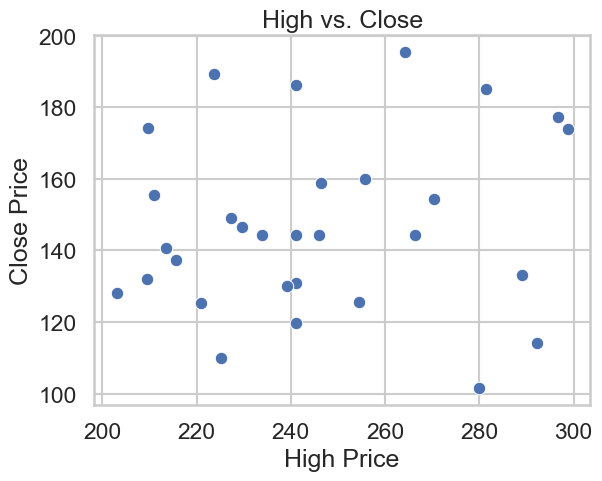

In [49]:
sns.scatterplot(x='high', y='close', data=df)
plt.title('High vs. Close')
plt.xlabel('High Price')
plt.ylabel('Close Price')
plt.show()

## 6. Correlation matrix

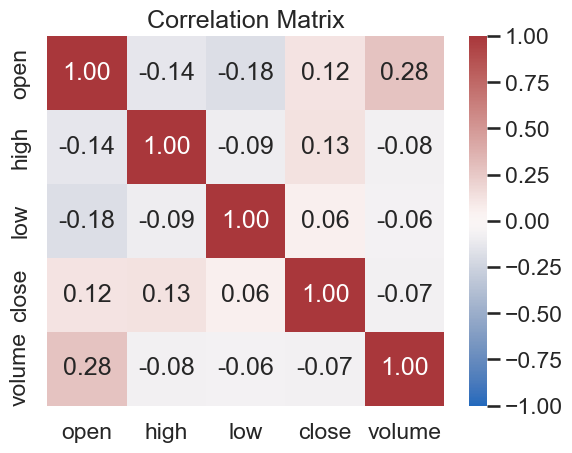

,open,high,low,close,volume
open,1.000000,-0.137907,-0.181838,0.117193,0.278261
high,-0.137907,1.000000,-0.094483,0.132269,-0.075592
low,-0.181838,-0.094483,1.000000,0.058787,-0.063434
close,0.117193,0.132269,0.058787,1.000000,-0.074956
volume,0.278261,-0.075592,-0.063434,-0.074956,1.000000


In [35]:
corr = df[['open','high','low','close','volume']].corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='vlag', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()
corr

## 7. Insights & Assumptions 

**Top 3 Insights:**
1. There is a clear positive relationship between income and spending, indicating that people with higher incomes generally spend more money.
2. The transactions data shows several extreme values that could distort analysis results and affect model predictions if not properly handled.
3. Both income and spend columns have missing data points that need to be resolved to ensure reliable modeling outcomes.

**Assumptions & Risks:**
- We assume the artificial data accurately represents real-world patterns; if not, our model may not work well with actual data.
- We assume linear relationships exist between variables, but real-world relationships might be more complex.
- Failing to properly address outliers and missing data could lead to biased results and poor model performance.

**Next Steps Before Modeling (Cleaning & Features):**
- Fix missing values in income and spend columns using appropriate methods like filling or removing them.
- Deal with extreme transaction values by setting limits, transforming the data, or removing them.
- Create new features such as regional statistics or combined variables to enhance model effectiveness.
- Scale or normalize numerical variables as needed for the specific modeling techniques we plan to use.

# Stage09: Feature Engineering

+ The purpose of project is to demonstrate the correlation between high price and volume. But it does not display in an ideal way. 

+ Therfore, I create 2 rationale functions in features.py file which save into the src/ to better achieve the project's goal.

In [68]:
#ensure correct working directory
os.chdir(r"C:\Users\noven\Desktop\Github Fre-5040 Bootcamp\bootcamp_Junkuang_Lai\Bootcamp_Junkuang_Lai\project")

In [69]:
#import libraries
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, os
from scipy.stats import skew, kurtosis
sns.set(context='talk', style='whitegrid')
pd.set_option('display.max_columns', 100)
from src import features

In [71]:
#dataset loaded
df = pd.read_csv(r"C:\Users\noven\Desktop\Github Fre-5040 Bootcamp\bootcamp_Junkuang_Lai\Bootcamp_Junkuang_Lai\project\data\processed\combined_cleaned_data.csv", index_col='date', parse_dates=['date'])

In [ ]:
# Feature Engineering 
window = 3
df['volume_high_ratio'] = df['volume'] / df['high']
df['rolling_high_mean'] = df['high'].rolling(window).mean()
df['high_change'] = df['high'].diff()

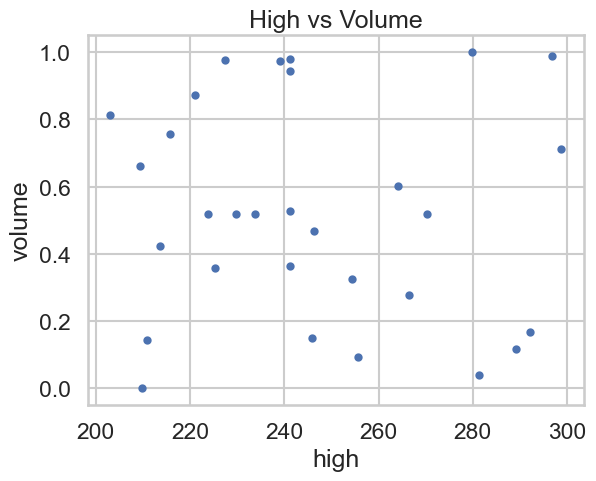

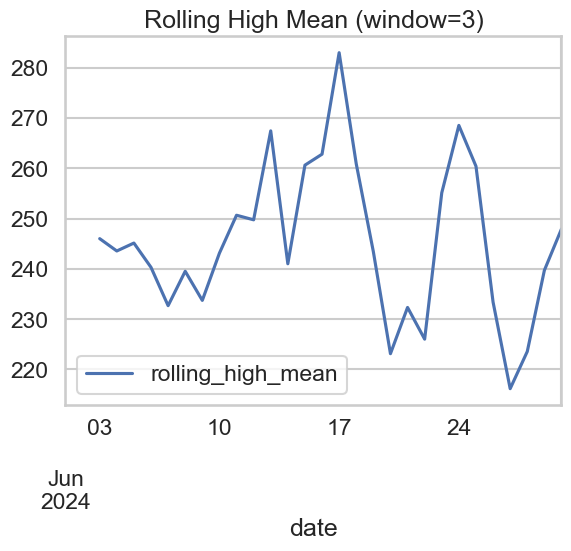

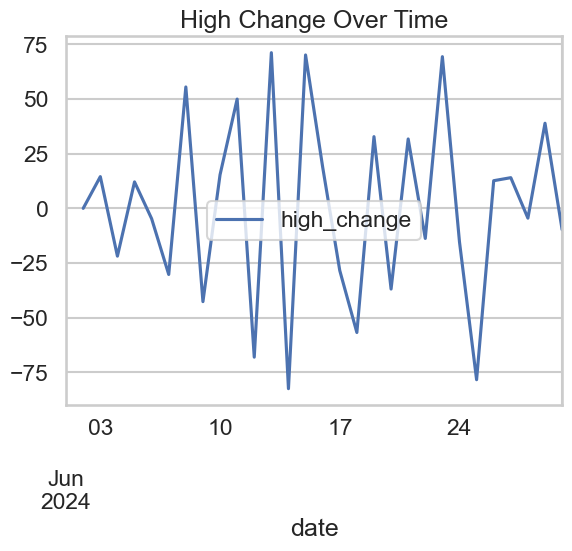

In [75]:
# Based on the EDA, I propose the following two features:
df_r1 = features.Rationale_1(df)
df_r2 = features.Rationale_2(df)
df_r3 = features.Rationale_3(df)

### Rationale for Feature 1
+ The volume_high_ratio feature is created to understand the relationship between high and volume.
+ By visualizing this relationship, we can identify potential outliers and trends in the data.

### Rationale for Feature 2
+ The rolling_high_mean feature is created to capture the trend of high prices over time.
+ By visualizing the rolling mean, we can identify periods of increased or decreased high prices behavior.

### Rationale for Feature 3
+ The high_change feature is created to understand how high prices behavior is changing over time.
+ By visualizing the change in high prices, we can identify trends and potential issues in customer behavior.

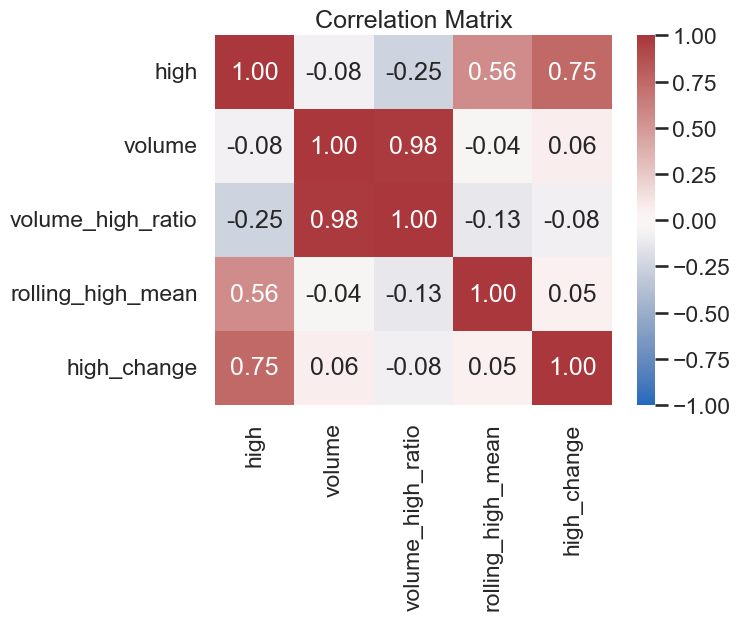

,high,volume,volume_high_ratio,rolling_high_mean,high_change
high,1.000000,-0.075592,-0.251205,0.560042,0.746604
volume,-0.075592,1.000000,0.977279,-0.042267,0.063088
volume_high_ratio,-0.251205,0.977279,1.000000,-0.131764,-0.083305
rolling_high_mean,0.560042,-0.042267,-0.131764,1.000000,0.053194
high_change,0.746604,0.063088,-0.083305,0.053194,1.000000


In [85]:
# correlation matrix for extra features
corr = df[['high','volume','volume_high_ratio', 'rolling_high_mean', 'high_change']].corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='vlag', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()
corr